# Problem Statement 

One of the leading retail store in US, Walmart , has multiple outlets across the country that are 
facing issues in managing the inventory - to match the demand with respect to supply. In this 
project, I am going to come up with useful insights that can be used by each stores to improve in 
various areas using some historical data and make prediction model to forecast the sales for the 
next 12 weeks.

# Objective

* Understand the dataset and features.
* Feature engineering and feature extraction based on data.
* Use suitable data preprocessing and data visualization.
* Make a suitable model to predict sales.

### Importing libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\bindu\Downloads\Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.shape

(6435, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [10]:
col_list=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
col_list

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

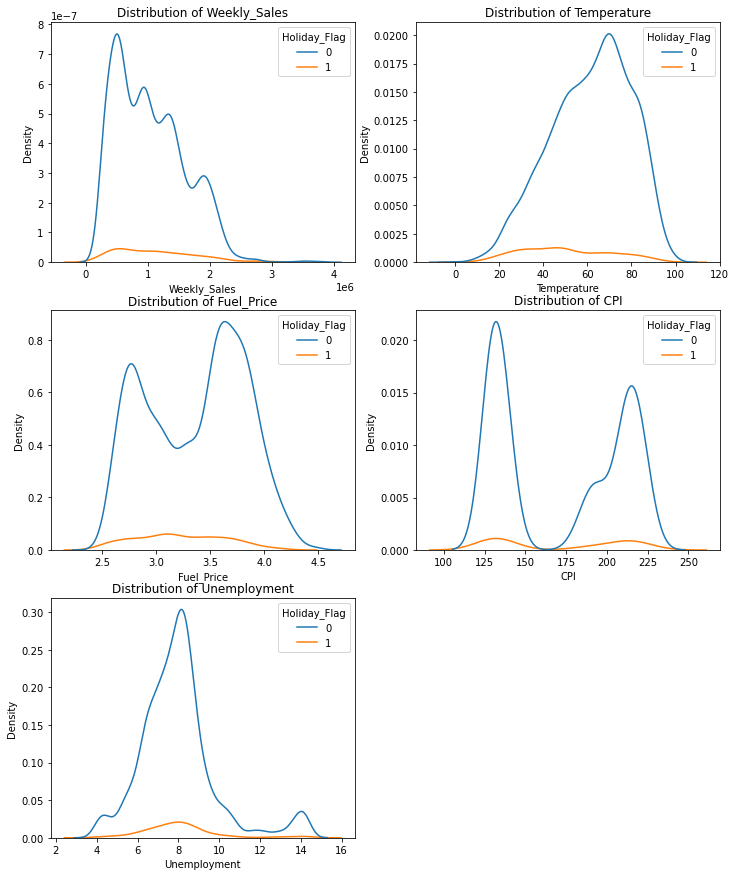

In [11]:
plt.figure(figsize =(12,15))
for i in range(0,len(col_list)):
    figure=plt.subplot(3,2,i+1)
    sns.kdeplot(data=data,x=col_list[i],hue='Holiday_Flag')
    plt.title(f'Distribution of {col_list[i]}')

In [12]:
col_list=['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
col_list

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

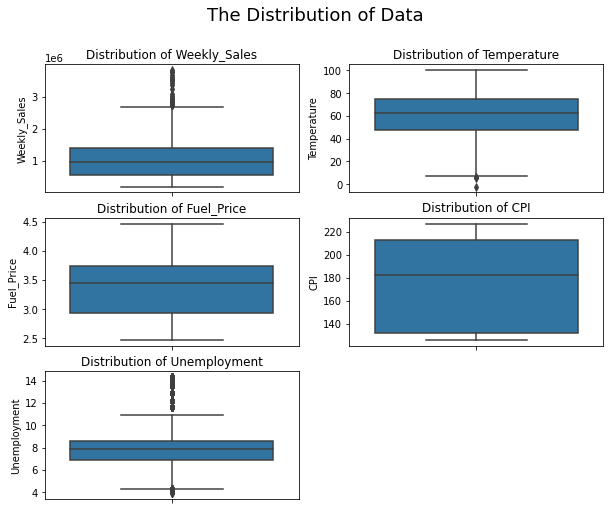

In [13]:
# Handling Outliers

plt.figure(figsize=(10,8))
plt.suptitle('The Distribution of Data',fontsize=18)
for i in range(0,len(col_list)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=data,y=col_list[i])
    plt.title(f'Distribution of {col_list[i]}')

In [14]:
Q1 = data.Weekly_Sales.quantile(0.25)
Q3 = data.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Weekly_Sales >= (Q1-1.5*IQR)) & (data.Weekly_Sales <= (Q3+1.5*IQR))]

In [15]:
Q1 = data.Temperature.quantile(0.25)
Q3 = data.Temperature.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Temperature >= (Q1-1.5*IQR)) & (data.Temperature <= (Q3+1.5*IQR))]

In [16]:
Q1 = data.Unemployment.quantile(0.25)
Q3 = data.Unemployment.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Unemployment >= (Q1-1.5*IQR)) & (data.Unemployment <= (Q3+1.5*IQR))]

In [17]:
data.shape

(5917, 8)

In [18]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


### Feature Engineering and Feature Extraction

In [19]:
# Extracting day month and year

data['Day'] = data['Date'].dt.weekday
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.index=data['Date']
data.drop('Date',axis=1,inplace=True)
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [20]:
mean_CPI = data.CPI.mean()
mean_fuel_price=data.Fuel_Price.mean()

In [21]:
# Convert CPI and Fuel price columns to Low and High
data['CPI']=np.where(data['CPI'] <= mean_CPI,'Low','High')
data['Fuel_Price']=np.where(data['Fuel_Price'] <= mean_fuel_price,'Low','High')

# Convert the Temperature column to (Warm,Cool,Cold,Hot)
data['Temperature']=np.where((data['Temperature']<=65)&(data['Temperature']>45),'Warm',
                             np.where((data['Temperature']<=45)&(data['Temperature']>25),'Cool',
                                      np.where((data['Temperature']<=25)&(data['Temperature']>=10),'Cold','Hot')))

In [22]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,Cool,Low,High,8.106,6,5,2010
2010-12-02,1,1641957.44,1,Cool,Low,High,8.106,3,12,2010
2010-02-19,1,1611968.17,0,Cool,Low,High,8.106,4,2,2010
2010-02-26,1,1409727.59,0,Warm,Low,High,8.106,4,2,2010
2010-05-03,1,1554806.68,0,Warm,Low,High,8.106,0,5,2010


In [23]:
print(data.CPI.value_counts())
print(data.Fuel_Price.value_counts())
print(data.Temperature.value_counts())

High    3274
Low     2643
Name: CPI, dtype: int64
High    3197
Low     2720
Name: Fuel_Price, dtype: int64
Hot     2702
Warm    1924
Cool    1084
Cold     207
Name: Temperature, dtype: int64


In [24]:
# Converting the numerical values in the day , month, year, holiday flag columns

# Date column
days={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
data['Day'] = data['Day'].map(days)

months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',
       11:'November',12:'December'}
data['Month']=data['Month'].map(months)

# Holiday_week column
holiday_week={1:'Holiday week',0:'Non-Holiday week'}
data['Holiday_Flag']=data['Holiday_Flag'].map(holiday_week)

data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,Non-Holiday week,Cool,Low,High,8.106,Saturday,May,2010
2010-12-02,1,1641957.44,Holiday week,Cool,Low,High,8.106,Wednesday,December,2010
2010-02-19,1,1611968.17,Non-Holiday week,Cool,Low,High,8.106,Thursday,February,2010
2010-02-26,1,1409727.59,Non-Holiday week,Warm,Low,High,8.106,Thursday,February,2010
2010-05-03,1,1554806.68,Non-Holiday week,Warm,Low,High,8.106,Sunday,May,2010


### EDA and Visualization

In [25]:
# Total yearly Sales

data.groupby('Year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
Year,
2011,2.260434e+09
2010,2.097829e+09
2012,1.791352e+09


In [26]:
# Total monthly sales

data.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
Month,
April,5.973073e+08
May,5.639639e+08
October,5.580741e+08
July,5.510156e+08
September,5.491708e+08
June,5.278322e+08
August,5.236554e+08
March,5.100323e+08
December,4.882449e+08


In [27]:
# Total daily sales

data.groupby('Day')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
Day,
Thursday,4.062584e+09
Sunday,4.909649e+08
Wednesday,4.402775e+08
Monday,4.026278e+08
Saturday,4.006949e+08
Friday,2.655530e+08
Tuesday,8.691354e+07


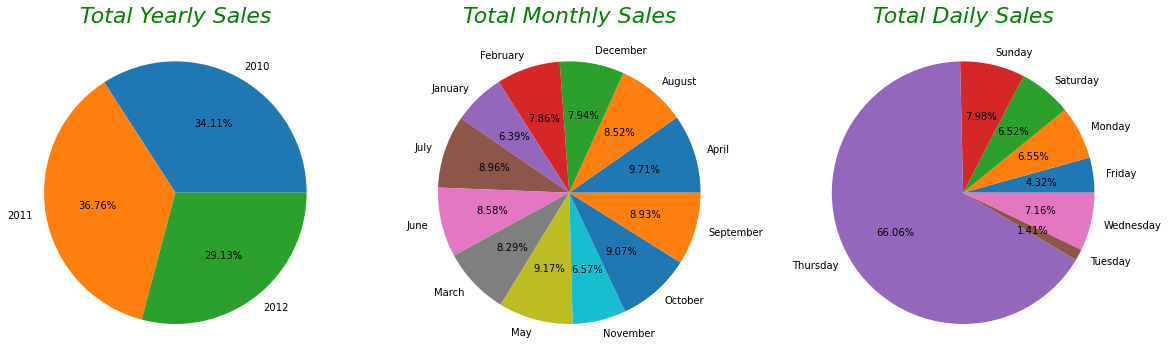

In [28]:
plt.figure(figsize=(20,15))
cols=["Year","Month","Day"]
titles=["Yearly","Monthly",'Daily']
for i in range(0,len(cols)):
    figure=plt.subplot(1,3,i+1)
    plt.pie(data.groupby(cols[i])['Weekly_Sales'].sum().values,labels=data.groupby(cols[i])['Weekly_Sales'].sum().index,
            autopct='%.2f%%')
    plt.title(f'Total {titles[i]} Sales', color='green', fontsize=22, fontstyle='italic')

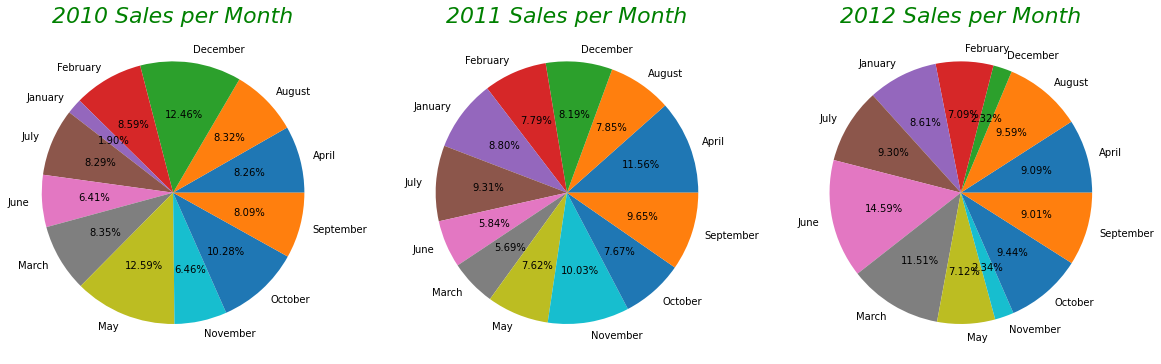

In [29]:
# Highest monthly sales in each year

plt.figure(figsize=(20,15))
df1=data[data['Year']==2010]
df2=data[data['Year']==2011]
df3=data[data['Year']==2012]
df=[df1,df2,df3]
years=['2010','2011','2012']
for i in range(0,len(df)):
    figure=plt.subplot(1,3,i+1)
    val=df[i].groupby('Month')['Weekly_Sales'].sum().values
    plt.pie(val,labels=df[i].groupby('Month')['Weekly_Sales'].sum().index,autopct='%.2f%%')
    plt.title(f'{years[i]} Sales per Month', color='green',fontsize=22,fontstyle='italic')

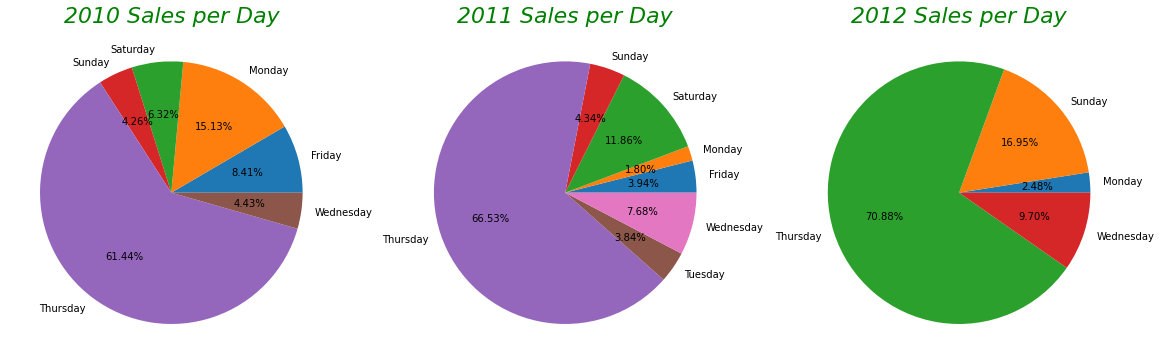

In [30]:
# Highest daily sales in each year

plt.figure(figsize=(20,15))
df1=data[data['Year']==2010]
df2=data[data['Year']==2011]
df3=data[data['Year']==2012]
df=[df1,df2,df3]
years=['2010','2011','2012']
for i in range(0,len(df)):
    figure=plt.subplot(1,3,i+1)
    val=df[i].groupby('Day')['Weekly_Sales'].sum().values
    plt.pie(val,labels=df[i].groupby('Day')['Weekly_Sales'].sum().index,autopct='%.2f%%')
    plt.title(f'{years[i]} Sales per Day', color='green',fontsize=22,fontstyle='italic')

In [31]:
sales=data.groupby(['Year','Month'])['Weekly_Sales'].sum().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,Year,Month,Weekly_Sales
0,2010,April,1.732263e+08
1,2010,August,1.744531e+08
2,2010,December,2.614204e+08
3,2010,February,1.802125e+08
4,2010,January,3.982560e+07
5,2010,July,1.739798e+08
6,2010,June,1.344962e+08
7,2010,March,1.752329e+08
8,2010,May,2.640776e+08
9,2010,November,1.355024e+08


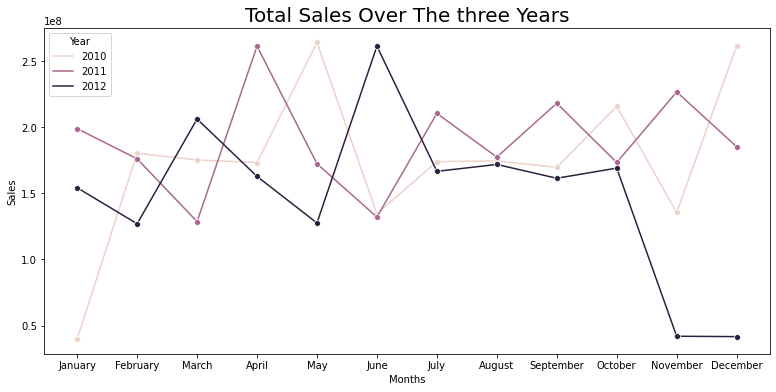

In [36]:
from calendar import month_name as mn
months = mn[1:]
df_sales.Month  = pd.Categorical(df_sales.Month,categories=months,ordered=True)
plt.figure(figsize=(13,6))
sns.lineplot(x='Month',y='Weekly_Sales',data=df_sales,hue='Year',marker='o')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Total Sales Over The three Years', fontsize=20);

In 2010 the sales jumped significantly in the months february and december, while sharply dropping occured in november 2012 and stayed stable on that level until the end of the month 

In [37]:
# Top 10 stores in total sales over all the years

data.groupby('Store')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales',ascending=False).head(10).reset_index()

,Store,Weekly_Sales
0,20,2.800237e+08
1,14,2.761276e+08
2,2,2.687221e+08
3,13,2.682025e+08
4,10,2.556789e+08
5,27,2.480387e+08
6,4,2.446487e+08
7,1,2.224028e+08
8,6,2.210286e+08
9,39,2.074455e+08


In [38]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2010-05-02,1,1643690.90,Non-Holiday week,Cool,Low,High,8.106,Saturday,May,2010
2010-12-02,1,1641957.44,Holiday week,Cool,Low,High,8.106,Wednesday,December,2010
2010-02-19,1,1611968.17,Non-Holiday week,Cool,Low,High,8.106,Thursday,February,2010
2010-02-26,1,1409727.59,Non-Holiday week,Warm,Low,High,8.106,Thursday,February,2010
2010-05-03,1,1554806.68,Non-Holiday week,Warm,Low,High,8.106,Sunday,May,2010
...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,Non-Holiday week,Warm,High,High,8.684,Thursday,September,2012
2012-05-10,45,733455.07,Non-Holiday week,Warm,High,High,8.667,Wednesday,May,2012
2012-12-10,45,734464.36,Non-Holiday week,Warm,High,High,8.667,Sunday,December,2012


In [39]:
# Total sales vs holiday flag

data.groupby('Holiday_Flag')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Holiday_Flag,
Non-Holiday week,5.704333e+09
Holiday week,4.452825e+08


Here the sales on non-holiday week is more than holiday week. So people prefer to buy from Walmart earlier before the holiday week

In [40]:
# Total sales vs temperature

data.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Temperature,
Hot,2.759108e+09
Warm,2.023666e+09
Cool,1.176644e+09
Cold,1.901981e+08


People spent more money in walmart in hot and warm weather

In [41]:
# Total sales vs fuel price

data.groupby('Fuel_Price')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Fuel_Price,
High,3.332622e+09
Low,2.816994e+09


In [42]:
# Total sales vs CPI

data.groupby('CPI')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
CPI,
High,3.286055e+09
Low,2.863560e+09


# Algorithm For The Project

I am choosing Time Series Analysis using the ARIMA (Autoregressive Integrated Moving Average) 
model for doing this model. It is a powerful machine learning technique which uses historical data 
and predicts future values based on data. I am choosing this method because time series helps to 
predict the future behavior of the variable based on past experience. We can also use seasonal 
decomposition technique to understand the trend, seasonality and irregularity of the data.

### Model building

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [44]:
# Dickey Adfuller Test : for checking stationarity


from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-value : ', dftest[1])
    print('3. Number of lags : ', dftest[2])
    print('4. Num of observations used for ADF Regression and Critical value calculation :', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [45]:
ad_test(data['Weekly_Sales'])

1. ADF :  -4.834947210291364
2. P-value :  4.6604406538043955e-05
3. Number of lags :  33
4. Num of observations used for ADF Regression and Critical value calculation : 5883
5. Critical Values : 
	 1% : -3.4314620441273576
	 5% : -2.862031419489671
	 10% : -2.5670315803973276


Since the p-value < 0.05, the dataset is stationary.

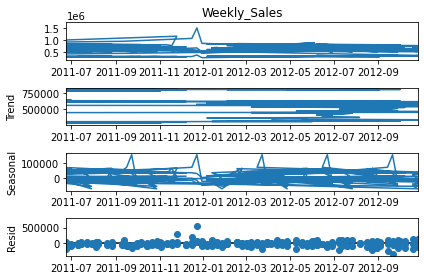

In [66]:
sea_dec=seasonal_decompose(data['Weekly_Sales'].iloc[-500:],period=52,model='additive')
sea_dec.plot()
plt.show()

In [46]:
#Auto-ARIMA technique : helps to find the best order for ARIMA on top of the dataset

from pmdarima import auto_arima

stepwise_fit = auto_arima(data['Weekly_Sales'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=157718.252, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158671.306, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=158019.685, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=157844.453, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=158669.311, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=157826.827, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=157783.693, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=157597.159, Time=1.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=157650.153, Time=1.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=157610.494, Time=3.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=157599.753, Time=2.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=157630.220, Time=1.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=157631.076, Time=1.10 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=157525.492, Time=3.46 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5917
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -78707.666
Date:                Sun, 21 Aug 2022   AIC                         157437.331
Time:                        13:36:28   BIC                         157510.871
Sample:                             0   HQIC                        157462.888
                               - 5917                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2071      0.131      1.583      0.113      -0.049       0.464
ar.L2         -0.2479      0.054     -4.575      0.000      -0.354      -0.142
ar.L3         -0.0925      0.061     -1.527      0.127      -0.211       0.026
ar.L4          0.1056      0.063      1.669      0.095      -0.018       0.230
ar.L5         -0.1316      0.074     -1.774      0.076      -0.277       0.014
ma.L1         -0.5831      0.131     -4.447      0.000      -0.840      -0.326
ma.L2          0.2838      0.064      4.403      0.000       0.157       0.410
ma.L3         -0.0715      0.058     -1.228      0.219      -0.186       0.043
ma.L4          0.0099      0.063      0.156      0.876      -0.114       0.134
ma.L5         -0.1145      0.068     -1.678      0.093      -0.248       0.019
sigma2      2.109e+10   4.19e-11   5.04e+20      0.000    2.11e+10    2.11e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):            142453.96
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+35. Standard errors may be unstable.
"""

In [49]:
# Fitting the dataset for testing and training

print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(5917, 10)
(5887, 10) (30, 10)


In [50]:
# Model fitting

model = ARIMA(train['Weekly_Sales'],order=(5,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Weekly_Sales   No. Observations:                 5886
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -78315.052
Method:                       css-mle   S.D. of innovations         145266.639
Date:                Sun, 21 Aug 2022   AIC                         156654.104
Time:                        13:36:54   BIC                         156734.268
Sample:                             1   HQIC                        156681.969
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -147.2030    854.712     -0.172      0.863   -1822.408    1528.002
ar.L1.D.Weekly_Sales     0.2082      0.092      2.251      0.024       0.027       0.389
ar.L2.D.Weekly_Sales    -0.2444      0.050     -4.840      0.000      -0.343      -0.145
ar.L3.D.Weekly_Sales    -0.0949      0.051     -1.871      0.061      -0.194       0.004
ar.L4.D.Weekly_Sales     0.0982      0.055      1.776      0.076      -0.010       0.207
ar.L5.D.Weekly_Sales    -0.1341      0.048     -2.790      0.005      -0.228      -0.040
ma.L1.D.Weekly_Sales    -0.5896      0.093     -6.364      0.000      -0.771      -0.408
ma.L2.D.Weekly_Sales     0.2846      0.067      4.244      0.000       0.153       0.416
ma.L3.D.Weekly_Sales    -0.0695      0.056     -1.232      0.218      -0.180       0.041
ma.L4.D.Weekly_Sales     0.0198      0.056      0.352      0.725      -0.091       0.130
ma.L5.D.Weekly_Sales    -0.1187      0.043     -2.758      0.006      -0.203      -0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5059           -0.0000j            1.5059           -0.5000
AR.2           -0.0842           -1.4012j            1.4037           -0.2596
AR.3           -0.0842           +1.4012j            1.4037            0.2596
AR.4            1.2033           -1.0320j            1.5852           -0.1128
AR.5            1.2033           +1.0320j            1.5852            0.1128
MA.1            1.3908           -0.0000j            1.3908           -0.0000
MA.2            0.5857           -1.2448j            1.3757           -0.1800
MA.3            0.5857           +1.2448j            1.3757            0.1800
MA.4           -1.1975           -1.3290j            1.7889           -0.3667
MA.5           -1.1975           +1.3290j            1.7889            0.3667
-----------------------------------------------------------------------------
"""

In [51]:
# Making predictions on the test set

start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=data.index[start:end+1]
print(pred)

Date
2012-06-04    790123.104557
2012-04-13    787344.619633
2012-04-20    784598.219578
2012-04-27    777688.457926
2012-04-05    783268.445467
2012-11-05    784208.859494
2012-05-18    783627.518225
2012-05-25    782265.036030
2012-01-06    783337.248385
2012-08-06    783120.856067
2012-06-15    782588.014362
2012-06-22    782200.593908
2012-06-29    782386.963986
2012-06-07    782234.169460
2012-07-13    781998.466246
2012-07-20    781830.679855
2012-07-27    781766.334057
2012-03-08    781604.522085
2012-10-08    781428.036699
2012-08-17    781280.293927
2012-08-24    781152.420724
2012-08-31    780999.604847
2012-07-09    780845.643199
2012-09-14    780700.445121
2012-09-21    780557.814988
2012-09-28    780408.571497
2012-05-10    780259.724718
2012-12-10    780113.347704
2012-10-19    779967.092294
2012-10-26    779819.226933
dtype: float64


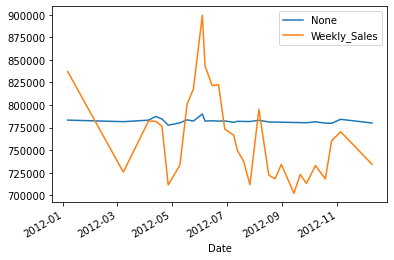

In [52]:
pred.plot(legend=True)
test['Weekly_Sales'].plot(legend=True);

In [53]:
#Checking whether this model is good or bad using mean of the dataset and mean squared error

test['Weekly_Sales'].mean()

763945.42

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Weekly_Sales']))
print(rmse)

49597.128051853906


Here, the mean of the dataset is 763945.42 and rmse value is 49597.128. Since they are not 
similar in range , this model is acceptable.

In [55]:
# Re-Training the model on entire dataset

model2=ARIMA(data['Weekly_Sales'],order=(5,1,5))
model2=model2.fit()
data.tail()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,,
2012-09-28,45,713173.95,Non-Holiday week,Warm,High,High,8.684,Thursday,September,2012
2012-05-10,45,733455.07,Non-Holiday week,Warm,High,High,8.667,Wednesday,May,2012
2012-12-10,45,734464.36,Non-Holiday week,Warm,High,High,8.667,Sunday,December,2012
2012-10-19,45,718125.53,Non-Holiday week,Warm,High,High,8.667,Thursday,October,2012
2012-10-26,45,760281.43,Non-Holiday week,Warm,High,High,8.667,Thursday,October,2012


In [58]:
# Making future prediction for next 12 weeks

index_future_dates=pd.date_range(start='2012-10-26',end='2013-01-18')
pred=model2.predict(start=len(data),end=len(data)+84,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
pred=pd.DataFrame(pred)
pred

,ARIMA Predictions
2012-10-26,749717.548647
2012-10-27,746947.447003
2012-10-28,737736.609047
2012-10-29,746715.247445
2012-10-30,740011.063388
...,...
2013-01-14,728963.344807
2013-01-15,728814.019349
2013-01-16,728664.693891
2013-01-17,728515.368433


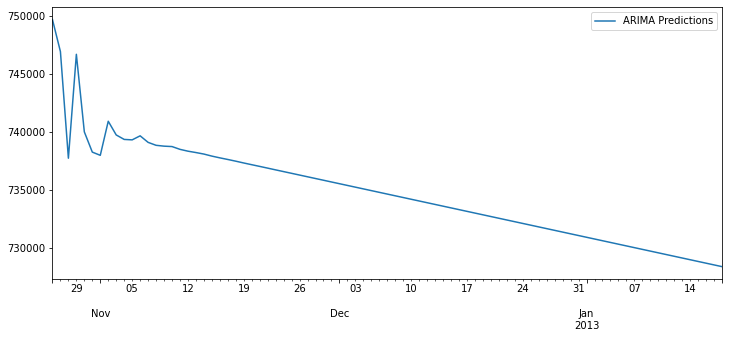

In [59]:
pred.plot(figsize=(12,5),legend=True);

# Inference From The Dataset

* People prefer to buy from Walmart earlier before the holiday week.
* People spent more money in Walmart in hot and warm weather.
* Walmart is having more sales when the fuel price and CPI is high.
* Future predictions indicates that there will be a gradual decrease in weekly sales over the 
  next 12 weeks (i.e, from November 2012 and January 2013).
